####  介绍
浏览器得到IP地址之后，浏览器就会向这个地址发送一个HTTP请求。
然后从百度的服务器端请求到了首页的HTML源码，然后通过浏览器引擎解析源码，
再次向服务器发请求得到里面引用过的Javascript、CSS、图片等资源，得到了上面的首页模样。

In [8]:
import urllib
response = urllib.request.urlopen('http://www.baidu.com')
response.code ## 2xx表示成功，3xx表示你应该去另一个地址，4xx表示你错了，5xx表示服务器错了
response.read

<bound method HTTPResponse.read of <http.client.HTTPResponse object at 0x000001E0DD6E4BA8>>

#### 豆瓣250
使用beautifulSoup第三方库


In [17]:
import requests

DOWNLOAD_URL = 'http://movie.douban.com/top250'


def download_page(url):
    headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.80 Safari/537.36'}
    data = requests.get(url,headers = headers).content
    return data

download_page(DOWNLOAD_URL)

b'<!DOCTYPE html>\n<html lang="zh-cmn-Hans" class="ua-mac ua-webkit">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <title>\n\xe8\xb1\x86\xe7\x93\xa3\xe7\x94\xb5\xe5\xbd\xb1 Top 250\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <link rel="apple-touch-icon" href="https://img3.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">\n    <link href="https://img3.doubanio.com/f/shire/bf61b1fa02f564a4a8f809da7c7179b883a56146/css/douban.css" rel="stylesheet" type="text/css">\n    <link href="https://img3.doubanio.com/f/shire/ae3f5a3e3085968370b1fc63afcecb22d3284848/css/separation/_all.css" rel="stylesheet" type="text/css">\n    <link href="https://img3

In [29]:
from bs4 import BeautifulSoup
all_film =[]
def parse_html(html):
    soup = BeautifulSoup(html)
    movie_name_list = []
    movie_list_soup = soup.find('ol',attrs = {'class':'grid_view'}) #ol标签：有序HTML列表，ul无序
    for movie_li in movie_list_soup.find_all('li'): #li，标签下的项目
        detail = movie_li.find('div',attrs = {'class':'hd'}) #div指一个区域
        movie_name = detail.find('span',attrs = {'class':'title'}).getText() # span可以把部分文档独立出来
        movie_name_list.append(movie_name)
        
    next_page = soup.find('span',attrs = {'class' : 'next'}).find('a')
    if next_page:
        all_film.append(movie_name_list)
        return  parse_html(download_page(DOWNLOAD_URL+next_page['href']))
    all_film.append(movie_name_list)
    pass


parse_html(download_page(DOWNLOAD_URL))

E:\python\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file E:\python\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [32]:
all_film
len(all_film)*len(all_film[0])


250

In [44]:
from bs4 import BeautifulSoup
all_years =[]
def parse_html(html):
    soup = BeautifulSoup(html)
    years_list = []
    years_list_soup = soup.find('ol',attrs = {'class':'grid_view'}) #ol标签：有序HTML列表，ul无序
    for years_li in years_list_soup.find_all('li'): #li，标签下的项目
        years_name = years_li.find('div',attrs = {'class':'bd'}).p.getText("/",strip = True) #div指一个区域
        years_list.append(years_name)
        
    next_page = soup.find('span',attrs = {'class' : 'next'}).find('a')
    if next_page:
        all_years.append(years_list)
        return  parse_html(download_page(DOWNLOAD_URL+next_page['href']))
    all_years.append(years_list)
    pass


parse_html(download_page(DOWNLOAD_URL))

E:\python\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file E:\python\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [64]:
import re
my_years = []
for i in range(len(all_years)):
    for j in range(len(all_years[i])):
        this_year = all_years[i][j].split('\xa0')[3][-4:]
        if re.match(r'\d\d\d\d', this_year):
            my_years.append(this_year)
            
my_years


['1994',
 '1993',
 '1994',
 '1994',
 '1997',
 '2001',
 '1997',
 '1993',
 '2010',
 '2008',
 '2009',
 '1998',
 '2009',
 '2004',
 '1995',
 '1998',
 '1988',
 '1972',
 '2014',
 '2011',
 '1939',
 '2011',
 '2002',
 '2006',
 '1988',
 '2010',
 '1957',
 '2012',
 '1999',
 '2008',
 '2000',
 '1994',
 '2003',
 '1986',
 '2016',
 '1995',
 '1953',
 '2009',
 '1957',
 '2006',
 '1998',
 '1975',
 '1992',
 '2004',
 '2013',
 '2009',
 '2005',
 '1989',
 '1974',
 '2001',
 '2002',
 '2016',
 '2001',
 '1994',
 '1995',
 '1984',
 '1994',
 '2002',
 '2013',
 '2001',
 '1995',
 '1997',
 '2006',
 '2006',
 '2016',
 '1965',
 '1995',
 '2008',
 '1990',
 '2000',
 '1994',
 '1999',
 '1998',
 '1991',
 '2010',
 '2008',
 '2004',
 '1997',
 '2009',
 '1997',
 '1987',
 '1994',
 '1997',
 '1999',
 '1994',
 '2014',
 '2010',
 '2001',
 '2012',
 '2003',
 '2002',
 '2003',
 '1993',
 '1996',
 '2005',
 '2000',
 '2010',
 '2011',
 '2003',
 '2002',
 '2008',
 '1936',
 '2009',
 '1995',
 '2014',
 '1984',
 '2004',
 '1995',
 '2011',
 '2006',
 '1987',
 

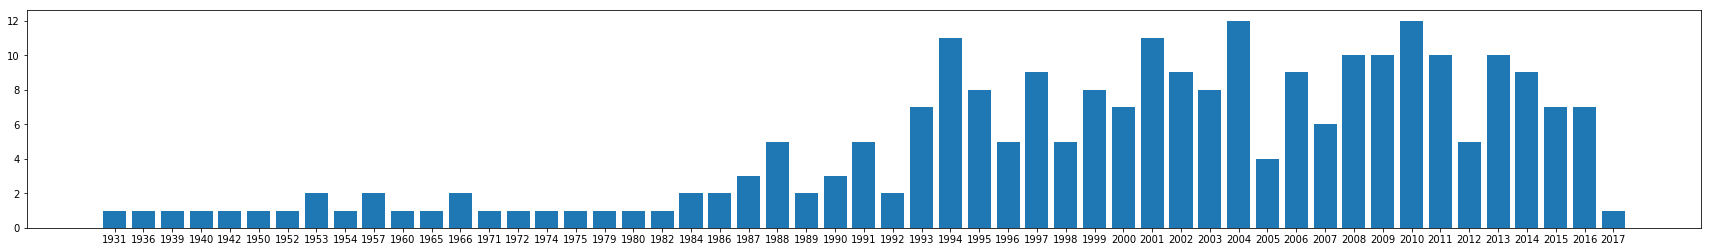

In [90]:
import matplotlib.pyplot as plt
def get_counts(anything):
    counts = {}
    for a in anything:
        if a in counts:
            counts[a] = counts[a] + 1
        else:
            counts[a] = 1
    return counts

final_value = get_counts(sorted(my_years))
plt.figure(figsize=(30,4))
plt.bar(range(len(final_value)), list(final_value.values()), align='center')
plt.xticks(range(len(final_value)), list(final_value.keys()))
#plt.bar(range(len(final_value)),final_value.items[1])
plt.show()